# Basic Model 

In [4]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import keras

Using TensorFlow backend.


In [5]:
## Creating a new dataframe from raw csv data 
raw_data = pd.read_csv('concrete_data.csv')
raw_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Data Exploration and Cleaning

In [6]:
raw_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
raw_data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [8]:
print('Number of columns - {}\nNumber of rows - {}'.format(raw_data.shape[1],raw_data.shape[0]))

Number of columns - 9
Number of rows - 1030


## Are there any missing values that we should be worried about ?
<hr>

In [9]:
'true' in raw_data.isnull().isna() # Is isnull() or isna() returning true anwyhere?

False

In [10]:
raw_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [11]:
raw_data.isnull().isna()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


## Let's check how different columns correlate
<hr>

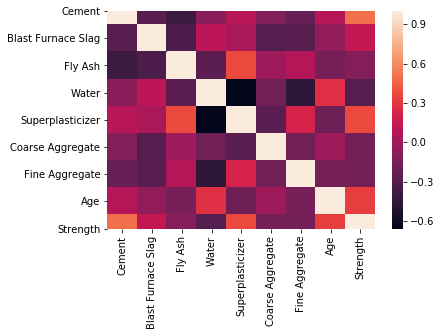

In [12]:
import seaborn as sns
sns.heatmap(raw_data.corr())

In [13]:
raw_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


## Now the features and target variable
<hr>

In [14]:
cols = raw_data.columns 
features = raw_data[[c for c in cols if c!='Strength' ]]
features.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [15]:
target = raw_data['Strength']
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

## Train Test Split!

In [16]:
from sklearn.model_selection import train_test_split
X = features
y = target
print("Shape of features - {}".format(X.shape))
print("Shape of target - {}".format(y.shape))

Shape of features - (1030, 8)
Shape of target - (1030,)


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
print("X_train - {}".format(X_train.shape))
print("y_train - {}".format(y_train.shape))
print("X_test - {}".format(X_test.shape))
print("y_test - {}".format(y_test.shape))
raw_data.shape

X_train - (721, 8)
y_train - (721,)
X_test - (309, 8)
y_test - (309,)


(1030, 9)

In [19]:
X_train.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
185,222.4,0.0,96.7,189.3,4.5,967.1,870.3,14
286,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,28
600,339.0,0.0,0.0,197.0,0.0,968.0,781.0,14
691,212.0,141.3,0.0,203.5,0.0,973.4,750.0,3
474,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28


In [20]:
n_features = X_train.shape[1]
n_features

8

In [21]:
y_train.head()

185    24.45
286    27.77
600    27.04
691     6.81
474    53.39
Name: Strength, dtype: float64

## Building a Regression Model in Keras
<hr>

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Activation 

from sklearn.metrics import mean_squared_error

In [30]:
def create_model():
    model = Sequential([
        Dense(10,activation='relu',input_shape=(n_features,)),
        Dense(1)
    ])
    
    #compile
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

In [31]:
first_model = create_model()
first_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


# Solution for  A. Build a baseline model

## Function that implementes the following algorithm 
1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

In [32]:
def models():
    count = 1
    regression_model = create_model()
    mean_squared_errors = np.empty(50) # empty ndarray to store MSEs
    
    while count<=50:
        # some information about the current count 
        print("We are at Iteration # {}....".format(count))
        # first the train test split 
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=count) # every time we have a new random seed
        
        # Training our model
        regression_model.fit(X_train,y_train,epochs=50)
        
        # Prediction 
        y_hat = regression_model.predict(X_test,verbose=1)
        
        # Evaluation with mean_squared_error (I have imported mse from sklearn for the first testing model in the cells above)
        
        mse = mean_squared_error(y_test,y_hat) # y_test -> true values, y_hat- > prediced values 
        mean_squared_errors[count-1] = mse 
        
        count = count + 1
        
    return mean_squared_errors
        
        
        
        
        
        
    

In [33]:
errors = models()

We are at Iteration # 1....
Epoch 1/50
721/721 [==============================] - 0s 417us/step - loss: 214937.1260
Epoch 2/50
721/721 [==============================] - 0s 87us/step - loss: 89233.1223
Epoch 3/50
721/721 [==============================] - 0s 81us/step - loss: 27240.3188
Epoch 4/50
721/721 [==============================] - 0s 80us/step - loss: 8229.2116
Epoch 5/50
721/721 [==============================] - 0s 67us/step - loss: 6015.0209
Epoch 6/50
721/721 [==============================] - 0s 76us/step - loss: 5451.2782
Epoch 7/50
721/721 [==============================] - 0s 62us/step - loss: 4943.1978
Epoch 8/50
721/721 [==============================] - 0s 60us/step - loss: 4482.8191
Epoch 9/50
721/721 [==============================] - 0s 105us/step - loss: 4065.6557
Epoch 10/50
721/721 [==============================] - 0s 79us/step - loss: 3683.9317
Epoch 11/50
721/721 [==============================] - 0s 64us/step - loss: 3349.1653
Epoch 12/50
721/721 [========

# MEAN AND STANDARD DEVIATION OF MEAN SQUARED ERRORS(Without Normalization)
<hr>

In [39]:
print("Mean - {}".format(errors.mean()))
print("Standard Deviation - {}".format(errors.std()))

Mean - 82.06041208959172
Standard Deviation - 102.64380369830786


## Mean of Mean Squared Errors for Data without Normalization - 82.06

# END OF A
<hr>

# B - Repeating A on Normalized version of Data
normalized(X) = (X-mean(X))/std(X)

In [42]:
def models_with_normalized_data():
    count = 1
    regression_model = create_model()
    mean_squared_errors = np.empty(50) # empty ndarray to store MSEs
    
    while count<=50:
        # some information about the current count 
        print("We are at Iteration # {}....".format(count))
        # first the train test split 
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=count) # every time we have a new random seed
        
        #Normalizing inputs for both training and test set
        X_train_normalized = (X_train-X_train.mean())/X_train.std()
        X_test_normalized =  (X_test-X_test.mean())/X_test.std()
        # Training our model
        regression_model.fit(X_train_normalized,y_train,epochs=50)
        
        # Prediction 
        y_hat = regression_model.predict(X_test_normalized,verbose=1)
        
        # Evaluation with mean_squared_error (I have imported mse from sklearn for the first testing model in the cells above)
        
        mse = mean_squared_error(y_test,y_hat) # y_test -> true values, y_hat- > prediced values 
        mean_squared_errors[count-1] = mse 
        
        count = count + 1
        
    return mean_squared_errors
        
        
        
        
        
        
    

In [36]:
norm_mses = models_with_normalized_data()

We are at Iteration # 1....
Epoch 1/50
721/721 [==============================] - 0s 399us/step - loss: 1609.6533
Epoch 2/50
721/721 [==============================] - 0s 61us/step - loss: 1592.7165
Epoch 3/50
721/721 [==============================] - 0s 134us/step - loss: 1576.1291
Epoch 4/50
721/721 [==============================] - 0s 96us/step - loss: 1560.0142
Epoch 5/50
721/721 [==============================] - 0s 84us/step - loss: 1544.0642
Epoch 6/50
721/721 [==============================] - 0s 91us/step - loss: 1528.0039
Epoch 7/50
721/721 [==============================] - 0s 68us/step - loss: 1511.8738
Epoch 8/50
721/721 [==============================] - 0s 74us/step - loss: 1495.7401
Epoch 9/50
721/721 [==============================] - 0s 132us/step - loss: 1479.0565
Epoch 10/50
721/721 [==============================] - 0s 149us/step - loss: 1462.1612
Epoch 11/50
721/721 [==============================] - 0s 108us/step - loss: 1444.7709
Epoch 12/50
721/721 [=========

In [38]:
norm_mean = norm_mses.mean()
norm_mean

55.22978612031985

## Mean of Mean Squared Errors for Normalized Data - 55.22 
This is better than A

## End of B
<hr>

# C - Increase the number of epochs 
Repeat Part B but use 100 epochs this time for training.
<hr>

In [43]:
def models_with_normalized_data_100epochs():
    count = 1
    regression_model = create_model()
    mean_squared_errors = np.empty(50) # empty ndarray to store MSEs
    
    while count<=50:
        # some information about the current count 
        print("We are at Iteration # {}....".format(count))
        # first the train test split 
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=count) # every time we have a new random seed
        
        #Normalizing inputs for both training and test set
        X_train_normalized = (X_train-X_train.mean())/X_train.std()
        X_test_normalized =  (X_test-X_test.mean())/X_test.std()
        # Training our model
        regression_model.fit(X_train_normalized,y_train,epochs=100)
        
        # Prediction 
        y_hat = regression_model.predict(X_test_normalized,verbose=1)
        
        # Evaluation with mean_squared_error (I have imported mse from sklearn for the first testing model in the cells above)
        
        mse = mean_squared_error(y_test,y_hat) # y_test -> true values, y_hat- > prediced values 
        mean_squared_errors[count-1] = mse 
        
        count = count + 1
        
    return mean_squared_errors
        
        
        
        
        
        
    

In [44]:
C_mses = models_with_normalized_data_100epochs()

We are at Iteration # 1....
Epoch 1/100
721/721 [==============================] - 0s 422us/step - loss: 1556.0760
Epoch 2/100
721/721 [==============================] - 0s 104us/step - loss: 1539.6230
Epoch 3/100
721/721 [==============================] - 0s 74us/step - loss: 1523.1715
Epoch 4/100
721/721 [==============================] - 0s 83us/step - loss: 1506.6707
Epoch 5/100
721/721 [==============================] - 0s 76us/step - loss: 1489.4731
Epoch 6/100
721/721 [==============================] - 0s 73us/step - loss: 1472.0364
Epoch 7/100
721/721 [==============================] - 0s 66us/step - loss: 1453.6873
Epoch 8/100
721/721 [==============================] - 0s 84us/step - loss: 1434.8248
Epoch 9/100
721/721 [==============================] - 0s 67us/step - loss: 1415.1393
Epoch 10/100
721/721 [==============================] - 0s 62us/step - loss: 1394.6401
Epoch 11/100
721/721 [==============================] - 0s 67us/step - loss: 1373.2994
Epoch 12/100
721/721 [

In [46]:
mean_new = C_mses.mean()
print("Mean with normalized data and 100 epochs of training - {}".format(mean_new))

Mean with normalized data and 100 epochs of training - 41.54728209094581


## Mean of Mean Squared Errors for Normalized Data with 100 epochs - 41.54
This is way better than C!

## End of C
<hr>

# D - Increase the number of hidden layers 
Repeat part B but use a neural network with the following instead:

Three hidden layers, each of 10 nodes and ReLU activation function.

In [48]:
n_features

8

In [52]:
def new_model():
    model = Sequential([
        Dense(10,activation='relu',input_shape=(n_features,)),
        Dense(10,activation='relu'),
        Dense(10,activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model

## Using the same function as used in B except for the model creation line uses the new_model with 3 hidden layers
<code>regression_model = new_model()</code>

In [55]:
def models_with_normalized_data_10layers():
    count = 1
    regression_model = new_model()
    mean_squared_errors = np.empty(50) # empty ndarray to store MSEs
    
    while count<=50:
        # some information about the current count 
        print("We are at Iteration # {}....".format(count))
        # first the train test split 
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=count) # every time we have a new random seed
        
        #Normalizing inputs for both training and test set
        X_train_normalized = (X_train-X_train.mean())/X_train.std()
        X_test_normalized =  (X_test-X_test.mean())/X_test.std()
        # Training our model
        regression_model.fit(X_train_normalized,y_train,epochs=50)
        
        # Prediction 
        y_hat = regression_model.predict(X_test_normalized,verbose=1)
        
        # Evaluation with mean_squared_error (I have imported mse from sklearn for the first testing model in the cells above)
        
        mse = mean_squared_error(y_test,y_hat) # y_test -> true values, y_hat- > prediced values 
        mean_squared_errors[count-1] = mse 
        
        count = count + 1
        
    return mean_squared_errors
        
        
        
        
        
        
    

In [56]:
d_model_mses = models_with_normalized_data_10layers()

We are at Iteration # 1....
Epoch 1/50
721/721 [==============================] - 1s 922us/step - loss: 1542.9891
Epoch 2/50
721/721 [==============================] - 0s 86us/step - loss: 1528.1401
Epoch 3/50
721/721 [==============================] - 0s 94us/step - loss: 1501.1161
Epoch 4/50
721/721 [==============================] - 0s 82us/step - loss: 1448.8690
Epoch 5/50
721/721 [==============================] - 0s 76us/step - loss: 1353.6049
Epoch 6/50
721/721 [==============================] - 0s 176us/step - loss: 1208.8213
Epoch 7/50
721/721 [==============================] - 0s 75us/step - loss: 1008.0911
Epoch 8/50
721/721 [==============================] - 0s 104us/step - loss: 761.5443
Epoch 9/50
721/721 [==============================] - 0s 76us/step - loss: 513.0763
Epoch 10/50
721/721 [==============================] - 0s 74us/step - loss: 322.8880
Epoch 11/50
721/721 [==============================] - 0s 82us/step - loss: 233.6393
Epoch 12/50
721/721 [===============

In [58]:
mean_d = d_model_mses.mean()
print("Mean with new network - {}".format(mean_d))

Mean with new network - 42.61704218655462


## Mean of Mean Squared Errors for Normalized Data with 100 epochs - 42.61
The model is better than B!